In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


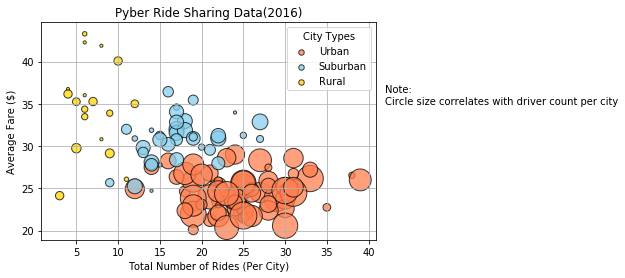

In [25]:
# Obtain the x and y coordinates for each of the three city types
#x = total # of rides (per city); y = average fare
city_index = city_ride_data.groupby(["city"])
city_type = city_data.set_index("city")["type"]
ride_count = city_index["ride_id"].count()
avg_fare = city_index["fare"].mean()
drivers = city_index["driver_count"].mean()

df = pd.DataFrame({
    "Total Ride Count": ride_count, 
    "Average Fare": avg_fare,
    "Total Driver Count": drivers,
    "City Type": city_type})
df.head()  

Urban = df.loc[df["City Type"] =='Urban']
Suburban = df.loc[df["City Type"] == 'Suburban']
Rural = df.loc[df["City Type"] == 'Rural']

# Build the scatter plots for each city types
plt.scatter(Urban["Total Ride Count"], Urban["Average Fare"],color = "Coral",edgecolors="black",s= Urban["Total Driver Count"]*10,alpha = 0.75)
plt.scatter(Suburban["Total Ride Count"], Suburban["Average Fare"],color = "SkyBlue",edgecolors="black",s= Suburban["Total Driver Count"]*10,alpha = 0.75)
plt.scatter(Rural["Total Ride Count"], Rural["Average Fare"],color = "Gold",edgecolors="black",s= Rural["Total Driver Count"]*10,alpha = 0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
handles = ["Urban", "Suburban", "Rural"]
lgnd = plt.legend(handles, title="City Types", loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("../Pyber/Pyber_scatter_plot.png")
plt.show()